In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import random

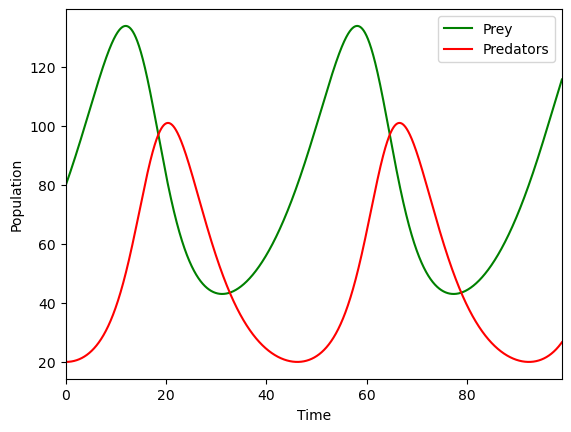

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\school\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [3]:
# 1a closed form

def lotka_volterra(alpha=.1, beta=.002, gamma=.2, delta=.0025, startpop=(80,20),
                   dt=.0001):
    ''' 
    Tbd
    '''
    preypop, predpop = startpop # unpacking tuple
    # lists to store history
    timehist = [0]
    preyhist = [preypop]
    predhist = [predpop]
    # defining iteration range per value of dt
    time = 100
    iterations = int(time/dt)

    for _ in range(iterations):
        # equations
        preychange = (((alpha*preypop) - (beta*(preypop*predpop))) * dt)
        predchange = ((-(gamma*predpop) + (delta*(preypop*predpop))) * dt)
        # incrementing pops for next iteration
        preypop += preychange
        predpop += predchange
        # appending to history
        timehist.append(timehist[-1] + dt)
        preyhist.append(preypop)
        predhist.append(predpop)

    # plotting results
    plt.figure()
    plt.plot(timehist, preyhist, color='green', label='Prey')
    plt.plot(timehist, predhist, color='red', label='Predators')
    plt.xlim(min(range(time)), max(range(time)))
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()
    return plt

lotka_volterra()

1b writeup

There are two types of stable states: oscillatory and equilibrium. An example of parameters that yield an oscillatory state are the "default" parameters that are provided in 1a. The equilibrium stable states can be found by setting the equations (rates of change) to zero and solving, which yields -- apart from the "everyone dead" scenario -- a state where y = a/B and x = gamma/delta. These represent a state where the birth rate of prey matches the predation rate and the death rate of predators matches the growth rate. To illustrate, I created a contrived scenario where each of these conditions are met: [img]

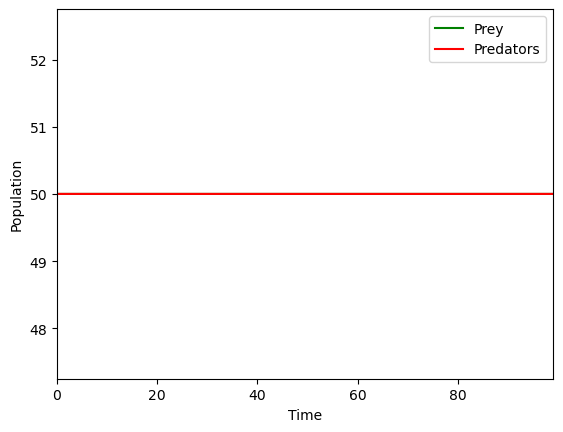

In [ ]:
# 1b sensitivity analysis

lotka_volterra(alpha=0.25, beta =0.005, gamma=0.1, delta=0.002, startpop=(50,50))

1c

bc of the diff in timing of the feedback

feedback in pr: pred eat prey but also need prey to survive, so they start to reduce in number as they overeat allowing more prey to reproduce which then gives more food for the predators and so on

the steady state is an attractor in the sis model due to an instant negative feedback; more susceptible leads to more infected and more infected leads to less susceptible

both are negative feedbacks but the feedback is delayed in the pr model

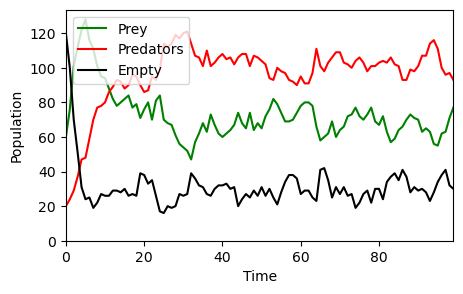

In [76]:
# 2a network version

def graphLotkaVolterra(G, prey=.3, pred=.1, alpha=.5, beta=.25, gamma=.1, delta=.6, T=100):
    '''' 
    tbd
    '''
    # ensure ratio not > 1
    if prey + pred > 1:
        print("Error: ratio must not be greater than 1")
        return None
    
    # list to store history
    history = []

    # setup to init node states
    allnodes = list(G.nodes())
    random.shuffle(allnodes)
    numnodes = int(len(G.nodes()))
    numprey = int(numnodes * prey)
    numpred = int(numnodes * pred)
    preynodes = allnodes[:numprey]
    prednodes = allnodes[numprey: numprey+numpred]

    # assigning initial attributes
    nx.set_node_attributes(G, 'empty', 'state')
    for node in preynodes:
        G.nodes[node]['state'] = 'prey'
    for node in prednodes:
        G.nodes[node]['state'] = 'pred'

    # main loop
    for t in range(T):
        # save current state and create next one
        history.append(G.copy())
        next_G = G.copy()
        for node in list(G.nodes()):
            current_state = G.nodes[node]['state']
            if current_state == 'prey':
                # list of neighbor types
                empties = [nbr for nbr in list(G.neighbors(node)) if G.nodes[nbr]['state'] == 'empty']
                preds = [nbr for nbr in list(G.neighbors(node)) if G.nodes[nbr]['state'] == 'pred']
                # prey reproduction
                if empties and random.random() <= alpha:
                    next_G.nodes[random.choice(empties)]['state'] = 'prey'
                # predation
                if preds and random.random() <= beta:
                    # predator reproduction
                    if random.random() <= delta:
                        next_G.nodes[node]['state'] = 'pred'
                    # no predator reproduction
                    else:
                        next_G.nodes[node]['state'] = 'empty'
            elif current_state == 'pred':
                # predator death
                if random.random() <= gamma:
                    next_G.nodes[node]['state'] = 'empty'
        G = next_G
    
    # plotting
    preycounts = []
    predcounts = []
    emptycounts = []
    for graph in history:
        preycount = 0
        predcount = 0
        emptycount = 0
        for n in graph.nodes():
            state = graph.nodes[n]['state']
            if state == 'prey':
                preycount += 1
            elif state == 'pred':
                predcount += 1
            else:
                emptycount += 1
        preycounts.append(preycount)
        predcounts.append(predcount)
        emptycounts.append(emptycount)
    t = range(len(history))
    plt.figure(figsize=(5,3))
    plt.plot(t, preycounts, color='green', label='Prey')
    plt.plot(t, predcounts, color='red', label='Predators')
    plt.plot(t, emptycounts, color='black', label='Empty')
    plt.xlim(min(range(T)), max(range(T)))
    plt.ylim(bottom=0)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

    return (plt, history)

G = nx.erdos_renyi_graph(200, .05)
time, hist = graphLotkaVolterra(G)


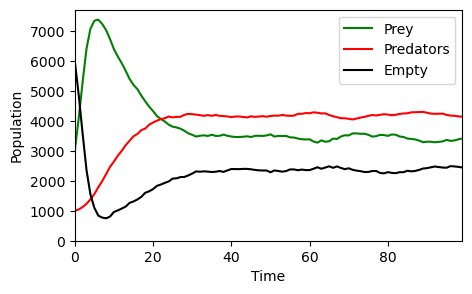

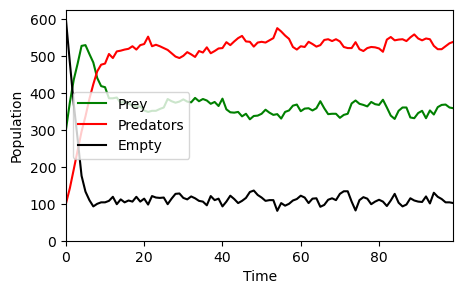

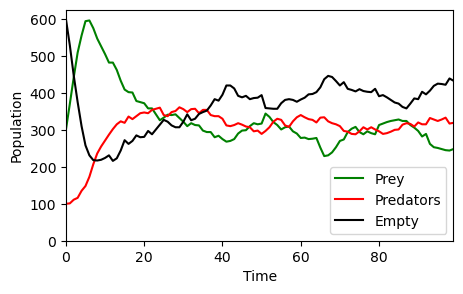

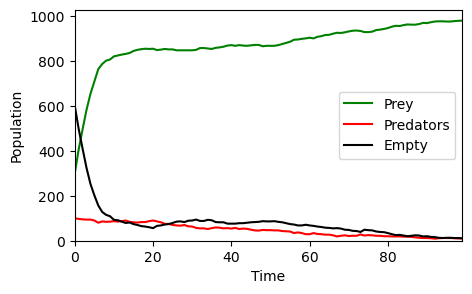

In [ ]:
# 2b network structure

G1 = nx.grid_2d_graph(100, 100)
G2 = nx.gnp_random_graph(1000, .05)
G3 = nx.barabasi_albert_graph(1000, 2)
G4 = nx.watts_strogatz_graph(1000, 2, .05)

plot1, history1 = graphLotkaVolterra(G1)
plot2, history2 = graphLotkaVolterra(G2)
plot3, history3 = graphLotkaVolterra(G3)
plot4, history4 = graphLotkaVolterra(G4)

2c

